# Swiss Roll

### Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Dimensionality-Reduction-Notebooks"):
    raise ValueError("Please change working directory to 'path/Dimensionality-Reduction-Notebooks' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Dimensionality-Reduction-Notebooks


In [2]:
!pip install -r requirements.txt

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Swiss Roll

In [5]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

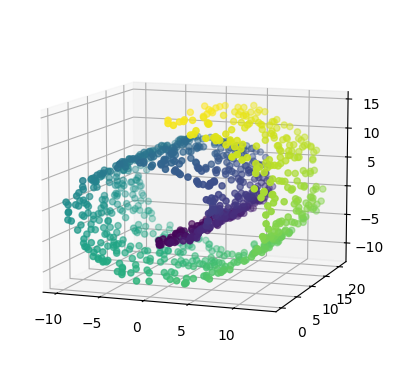

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t)

ax.view_init(10, -70)
plt.show()

## LLE (Locally Linear Embedding)

In [78]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

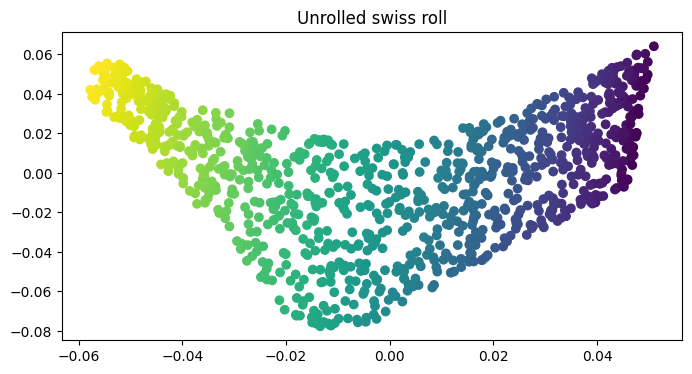

In [82]:
plt.figure(figsize=(8, 4))
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t)
plt.title("Unrolled swiss roll")
plt.show()

## MDS (Multidimensional Scaling)

In [83]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

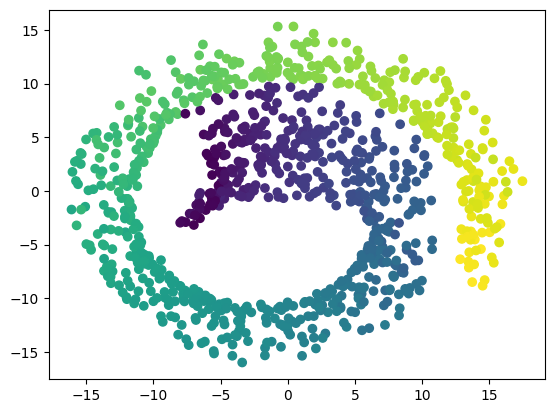

In [86]:
plt.scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=t)
plt.show()

## Isomap

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

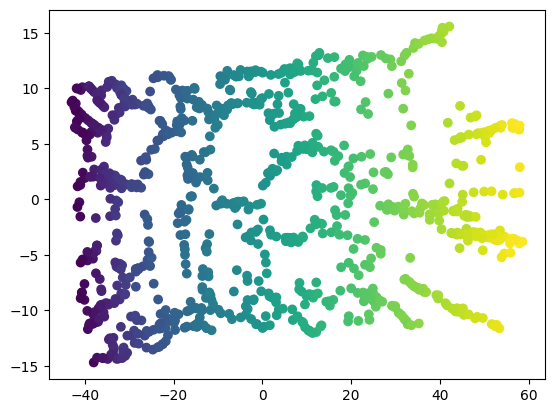

In [ ]:
plt.scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=t)
plt.show()

## TSNE (t-distributed stochastic neighbor embedding)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

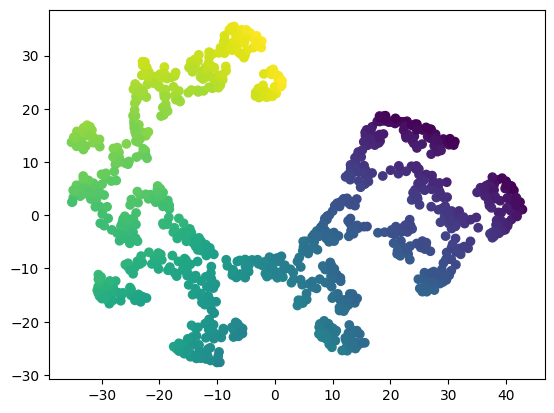

In [ ]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t)
plt.show()

## LDA (Linear Discriminant Analysis)

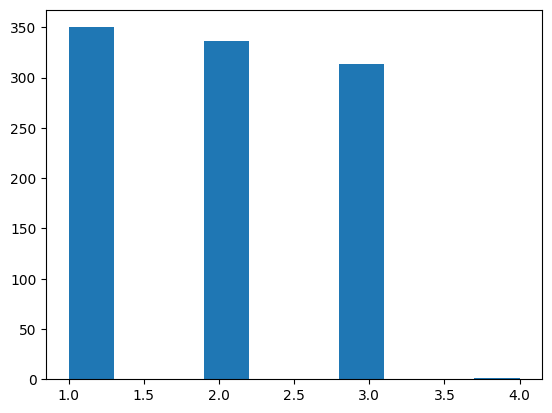

In [ ]:
bin_edges = np.histogram_bin_edges(t, bins=3)
binned_labels = np.digitize(t, bin_edges)
plt.hist(binned_labels)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

X_reduced_lda = lda.fit_transform(X_swiss, binned_labels)

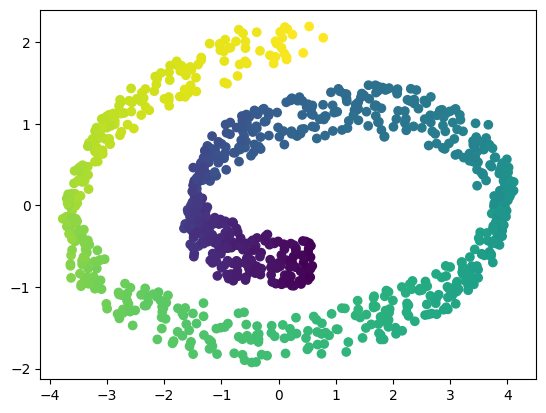

In [ ]:
plt.scatter(X_reduced_lda[:, 0], X_reduced_lda[:, 1], c=t)
plt.show()